## 十分钟入门 Pandas

In [1]:
# learn_pandas
#
# created by LuYF-Lemon-love <luyanfeng_nlp@qq.com> on November 27, 2022
# updated by LuYF-Lemon-love <luyanfeng_nlp@qq.com> on February 3, 2023
#
# 参考文档链接: https://www.pypandas.cn/docs/getting_started/10min.html

## 导入 Pandas 与 NumPy

In [2]:
import numpy as np
import pandas as pd

## 生成对象

用**列表**生成 **Series** 时，**Pandas** 默认**自动生成整数索引**：

In [3]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

用含**日期时间索引**与**标签 (列名)**的 **NumPy 数组**生成 **DataFrame** ：

In [4]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [5]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,1.959474,-0.388166,-1.698329,-0.216114
2013-01-02,0.295145,-1.598542,0.422077,0.960265
2013-01-03,0.854286,-0.386440,0.190415,1.520324
2013-01-04,1.566034,-2.575651,-0.949303,-1.670698
2013-01-05,-0.993085,1.611275,-0.204665,-0.183928
2013-01-06,0.002922,1.084618,-2.010518,-0.378324


用 **Series** **字典**对象生成 **DataFrame**：

In [6]:
df2 = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('20130102'),
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                    'D': np.array([3] * 4, dtype='int32'),
                    'E': pd.Categorical(["test", "train", "test", "train"]),
                    'F': 'foo'})
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


**DataFrame** 的**列**有**不同数据类型**。

In [7]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

**IPython** 支持 **tab** 键**自动补全列名与公共属性**。列 **A**、**B**、**C**、**D** 和 **E** 都可以**自动补全**。

## 查看数据

查看 **DataFrame** **头部**和**尾部**数据：

In [8]:
df.head()

,A,B,C,D
2013-01-01,1.959474,-0.388166,-1.698329,-0.216114
2013-01-02,0.295145,-1.598542,0.422077,0.960265
2013-01-03,0.854286,-0.386440,0.190415,1.520324
2013-01-04,1.566034,-2.575651,-0.949303,-1.670698
2013-01-05,-0.993085,1.611275,-0.204665,-0.183928


In [9]:
df.tail(3)

,A,B,C,D
2013-01-04,1.566034,-2.575651,-0.949303,-1.670698
2013-01-05,-0.993085,1.611275,-0.204665,-0.183928
2013-01-06,0.002922,1.084618,-2.010518,-0.378324


显示**索引**与**列名**：

In [10]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [11]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

**DataFrame.to_numpy()** 输出底层数据的 **NumPy** 对象。注意，**DataFrame** 的列由**多种数据类型**组成时，该操作**耗费系统资源较大**，这也是 **Pandas** 和 **NumPy** 的本质区别：**NumPy 数组只有一种数据类型，DataFrame 每列的数据类型各不相同**。调用 **DataFrame.to_numpy()** 时，**Pandas** 查找**支持 DataFrame 里所有数据类型**的 **NumPy 数据类型**。还有一种数据类型是 **object**，可以把 **DataFrame** 列里的值强制转换为 **Python** 对象。

下面的 **df** 这个 **DataFrame** 里的值都是**浮点数**，**DataFrame.to_numpy()** 的**操作会很快**，而且**不复制数据**。

In [12]:
df.to_numpy()

array([[ 1.95947356, -0.38816582, -1.69832948, -0.21611397],
       [ 0.29514492, -1.59854165,  0.42207746,  0.9602649 ],
       [ 0.85428621, -0.38644049,  0.19041467,  1.52032412],
       [ 1.56603356, -2.5756506 , -0.94930305, -1.67069752],
       [-0.99308499,  1.61127466, -0.20466474, -0.18392772],
       [ 0.00292154,  1.08461817, -2.01051771, -0.37832399]])

**df2** 这个 **DataFrame** 包含了**多种类型**，**DataFrame.to_numpy()** 操作会**耗费较多资源**。

In [13]:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

>**DataFrame.to_numpy()** 的**输出**不包含**行索引**和**列标签**。

**describe()** 可以**快速查看数据的统计摘要**：

In [14]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.614129,-0.375484,-0.708387,0.005254
std,1.080020,1.575817,1.007284,1.117875
min,-0.993085,-2.575651,-2.010518,-1.670698
25%,0.075977,-1.295948,-1.511073,-0.337771
50%,0.574716,-0.387303,-0.576984,-0.200021
75%,1.388097,0.716854,0.091645,0.674217
max,1.959474,1.611275,0.422077,1.520324


转置数据：

In [15]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,1.959474,0.295145,0.854286,1.566034,-0.993085,0.002922
B,-0.388166,-1.598542,-0.386440,-2.575651,1.611275,1.084618
C,-1.698329,0.422077,0.190415,-0.949303,-0.204665,-2.010518
D,-0.216114,0.960265,1.520324,-1.670698,-0.183928,-0.378324


按轴排序：

In [16]:
'''
    Parameters
    ----------
    axis : {0 or 'index', 1 or 'columns'}, default 0
        The axis along which to sort.  The value 0 identifies the rows,
        and 1 identifies the columns.
'''

df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-0.216114,-1.698329,-0.388166,1.959474
2013-01-02,0.960265,0.422077,-1.598542,0.295145
2013-01-03,1.520324,0.190415,-0.386440,0.854286
2013-01-04,-1.670698,-0.949303,-2.575651,1.566034
2013-01-05,-0.183928,-0.204665,1.611275,-0.993085
2013-01-06,-0.378324,-2.010518,1.084618,0.002922


按值排序：

In [17]:
'''
    Parameters
    ----------
            by : str or list of str
                Name or list of names to sort by.
    
                - if `axis` is 0 or `'index'` then `by` may contain index
                  levels and/or column labels.
                - if `axis` is 1 or `'columns'` then `by` may contain column
                  levels and/or index labels.
    axis : {0 or 'index', 1 or 'columns'}, default 0
         Axis to be sorted.
'''

df.sort_values(by='B')

,A,B,C,D
2013-01-04,1.566034,-2.575651,-0.949303,-1.670698
2013-01-02,0.295145,-1.598542,0.422077,0.960265
2013-01-01,1.959474,-0.388166,-1.698329,-0.216114
2013-01-03,0.854286,-0.386440,0.190415,1.520324
2013-01-06,0.002922,1.084618,-2.010518,-0.378324
2013-01-05,-0.993085,1.611275,-0.204665,-0.183928


## 选择

选择、设置标准 **Python / Numpy** 的表达式已经非常直观，交互也很方便，但对于**生产代码**，还是**推荐优化过的 Pandas 数据访问方法**：**.at**、**.iat**、**.loc** 和 **.iloc**。

### 获取数据

选择**单列**，产生 **Series**，与 **df.A** 等效：

In [18]:
df['A']

2013-01-01    1.959474
2013-01-02    0.295145
2013-01-03    0.854286
2013-01-04    1.566034
2013-01-05   -0.993085
2013-01-06    0.002922
Freq: D, Name: A, dtype: float64

用 **[]** 切片**行**：

In [19]:
df[0:3]

,A,B,C,D
2013-01-01,1.959474,-0.388166,-1.698329,-0.216114
2013-01-02,0.295145,-1.598542,0.422077,0.960265
2013-01-03,0.854286,-0.386440,0.190415,1.520324


In [20]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,0.295145,-1.598542,0.422077,0.960265
2013-01-03,0.854286,-0.386440,0.190415,1.520324
2013-01-04,1.566034,-2.575651,-0.949303,-1.670698


In [21]:
df['2013-01-02':'2013-01-04']

,A,B,C,D
2013-01-02,0.295145,-1.598542,0.422077,0.960265
2013-01-03,0.854286,-0.386440,0.190415,1.520324
2013-01-04,1.566034,-2.575651,-0.949303,-1.670698


In [22]:
df['2013/01/02':'2013/01/04']

,A,B,C,D
2013-01-02,0.295145,-1.598542,0.422077,0.960265
2013-01-03,0.854286,-0.386440,0.190415,1.520324
2013-01-04,1.566034,-2.575651,-0.949303,-1.670698


### 按标签选择

用**标签**提取**一行数据**：

In [23]:
df.loc[dates[0]]

A    1.959474
B   -0.388166
C   -1.698329
D   -0.216114
Name: 2013-01-01 00:00:00, dtype: float64

用**标签**选择**多列数据**：

In [24]:
df.loc[:, ['A', 'B']]

,A,B
2013-01-01,1.959474,-0.388166
2013-01-02,0.295145,-1.598542
2013-01-03,0.854286,-0.386440
2013-01-04,1.566034,-2.575651
2013-01-05,-0.993085,1.611275
2013-01-06,0.002922,1.084618


用**标签切片**，包含**行**与**列**结束点：

In [25]:
df.loc['20130102':'20130104', ['A', 'B']]

,A,B
2013-01-02,0.295145,-1.598542
2013-01-03,0.854286,-0.386440
2013-01-04,1.566034,-2.575651


返回对象：

In [26]:
df.loc['20130102', ['A', 'B']]

A    0.295145
B   -1.598542
Name: 2013-01-02 00:00:00, dtype: float64

提取标量值：

In [27]:
df.loc[dates[0], 'A']

1.9594735609834342

快速访问标量，与上述方法等效：

In [28]:
df.at[dates[0], 'A']

1.9594735609834342

### 按位置选择

用**整数位置**选择：

In [29]:
df.iloc[3]

A    1.566034
B   -2.575651
C   -0.949303
D   -1.670698
Name: 2013-01-04 00:00:00, dtype: float64

类似 **NumPy / Python**，用**整数切片**：

In [30]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,1.566034,-2.575651
2013-01-05,-0.993085,1.611275


类似 **NumPy / Python**，用**整数列表**按**位置切片**：

In [31]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,0.295145,0.422077
2013-01-03,0.854286,0.190415
2013-01-05,-0.993085,-0.204665


显式**整行切片**：

In [32]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,0.295145,-1.598542,0.422077,0.960265
2013-01-03,0.854286,-0.386440,0.190415,1.520324


显式**整列切片**：

In [33]:
df.iloc[:, 1:3]

,B,C
2013-01-01,-0.388166,-1.698329
2013-01-02,-1.598542,0.422077
2013-01-03,-0.386440,0.190415
2013-01-04,-2.575651,-0.949303
2013-01-05,1.611275,-0.204665
2013-01-06,1.084618,-2.010518


显式**提取值**：

In [34]:
df.iloc[1, 1]

-1.5985416509892818

快速**访问标量**，与**上述方法**等效：

In [35]:
df.iat[1, 1]

-1.5985416509892818

### 布尔索引

用**单列的值**选择数据：

In [36]:
df[df.A > 0]

,A,B,C,D
2013-01-01,1.959474,-0.388166,-1.698329,-0.216114
2013-01-02,0.295145,-1.598542,0.422077,0.960265
2013-01-03,0.854286,-0.386440,0.190415,1.520324
2013-01-04,1.566034,-2.575651,-0.949303,-1.670698
2013-01-06,0.002922,1.084618,-2.010518,-0.378324


选择 **DataFrame** 里**满足条件**的值：

In [37]:
df[df > 0]

,A,B,C,D
2013-01-01,1.959474,NaN,NaN,NaN
2013-01-02,0.295145,NaN,0.422077,0.960265
2013-01-03,0.854286,NaN,0.190415,1.520324
2013-01-04,1.566034,NaN,NaN,NaN
2013-01-05,NaN,1.611275,NaN,NaN
2013-01-06,0.002922,1.084618,NaN,NaN


用 **isin()** 筛选：

In [38]:
df2 = df.copy()
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df2

,A,B,C,D,E
2013-01-01,1.959474,-0.388166,-1.698329,-0.216114,one
2013-01-02,0.295145,-1.598542,0.422077,0.960265,one
2013-01-03,0.854286,-0.386440,0.190415,1.520324,two
2013-01-04,1.566034,-2.575651,-0.949303,-1.670698,three
2013-01-05,-0.993085,1.611275,-0.204665,-0.183928,four
2013-01-06,0.002922,1.084618,-2.010518,-0.378324,three


In [39]:
'''
    Whether elements in Series are contained in `values`.
    
    Return a boolean Series showing whether each element in the Series
    matches an element in the passed sequence of `values` exactly.
    
    Parameters
    ----------
    values : set or list-like
        The sequence of values to test. Passing in a single string will
        raise a ``TypeError``. Instead, turn a single string into a
        list of one element.
'''

df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2013-01-03,0.854286,-0.386440,0.190415,1.520324,two
2013-01-05,-0.993085,1.611275,-0.204665,-0.183928,four


### 赋值

用**索引**自动对齐**新增列的数据**：

In [40]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range('20130102', periods=6))
df['F'] = s1
df

,A,B,C,D,F
2013-01-01,1.959474,-0.388166,-1.698329,-0.216114,NaN
2013-01-02,0.295145,-1.598542,0.422077,0.960265,1.0
2013-01-03,0.854286,-0.386440,0.190415,1.520324,2.0
2013-01-04,1.566034,-2.575651,-0.949303,-1.670698,3.0
2013-01-05,-0.993085,1.611275,-0.204665,-0.183928,4.0
2013-01-06,0.002922,1.084618,-2.010518,-0.378324,5.0


按**标签赋值**：

In [41]:
df.at[dates[0], 'A'] = 0

按**位置赋值**：

In [42]:
df.iat[0, 1] = 0

按 **NumPy 数组**赋值：

In [43]:
df.loc[:, 'D'] = np.array([5] * len(df))

上述**赋值结果**：

In [44]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.698329,5,NaN
2013-01-02,0.295145,-1.598542,0.422077,5,1.0
2013-01-03,0.854286,-0.386440,0.190415,5,2.0
2013-01-04,1.566034,-2.575651,-0.949303,5,3.0
2013-01-05,-0.993085,1.611275,-0.204665,5,4.0
2013-01-06,0.002922,1.084618,-2.010518,5,5.0


用 **where** 条件赋值：

In [45]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.698329,-5,NaN
2013-01-02,-0.295145,-1.598542,-0.422077,-5,-1.0
2013-01-03,-0.854286,-0.386440,-0.190415,-5,-2.0
2013-01-04,-1.566034,-2.575651,-0.949303,-5,-3.0
2013-01-05,-0.993085,-1.611275,-0.204665,-5,-4.0
2013-01-06,-0.002922,-1.084618,-2.010518,-5,-5.0


## 缺失值

**Pandas** 主要用 **np.nan** 表示**缺失数据**。计算时，默认不包含空值。

**重建索引**（reindex）可以**更改**、**添加**、**删除**指定轴的索引，并**返回数据副本**，即不更改原数据。

In [46]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1], 'E'] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-1.698329,5,NaN,1.0
2013-01-02,0.295145,-1.598542,0.422077,5,1.0,1.0
2013-01-03,0.854286,-0.386440,0.190415,5,2.0,NaN
2013-01-04,1.566034,-2.575651,-0.949303,5,3.0,NaN


**删除**所有**含缺失值的行**：

In [47]:
'''
    Remove missing values.
    
    Parameters
    ----------
    axis : {0 or 'index', 1 or 'columns'}, default 0
        Determine if rows or columns which contain missing values are
        removed.
    
        * 0, or 'index' : Drop rows which contain missing values.
        * 1, or 'columns' : Drop columns which contain missing value.
    
        .. versionchanged:: 1.0.0
    
           Pass tuple or list to drop on multiple axes.
           Only a single axis is allowed.
    
    how : {'any', 'all'}, default 'any'
        Determine if row or column is removed from DataFrame, when we have
        at least one NA or all NA.
    
        * 'any' : If any NA values are present, drop that row or column.
        * 'all' : If all values are NA, drop that row or column.
'''

df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,0.295145,-1.598542,0.422077,5,1.0,1.0


填充缺失值：

In [48]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-1.698329,5,5.0,1.0
2013-01-02,0.295145,-1.598542,0.422077,5,1.0,1.0
2013-01-03,0.854286,-0.386440,0.190415,5,2.0,5.0
2013-01-04,1.566034,-2.575651,-0.949303,5,3.0,5.0


提取 **nan** 值的**布尔掩码**：

In [49]:
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## 运算

### 统计

一般情况下，运算时**排除缺失值**。

描述性统计：

In [50]:
df.mean()

A    0.287550
B   -0.310790
C   -0.708387
D    5.000000
F    3.000000
dtype: float64

在**另一个轴(即，行)**上执行同样的操作：

In [51]:
df.mean(1)

2013-01-01    0.825418
2013-01-02    1.023736
2013-01-03    1.531652
2013-01-04    1.208216
2013-01-05    1.882705
2013-01-06    1.815404
Freq: D, dtype: float64

**不同维度对象运算**时，**要先对齐**。 此外，**Pandas** 自动**沿指定维度广播**。

In [52]:
'''
    Examples
    --------
    >>> df = pd.DataFrame({"Col1": [10, 20, 15, 30, 45],
    ...                    "Col2": [13, 23, 18, 33, 48],
    ...                    "Col3": [17, 27, 22, 37, 52]},
    ...                   index=pd.date_range("2020-01-01", "2020-01-05"))
    >>> df
                Col1  Col2  Col3
    2020-01-01    10    13    17
    2020-01-02    20    23    27
    2020-01-03    15    18    22
    2020-01-04    30    33    37
    2020-01-05    45    48    52
    
    >>> df.shift(periods=3)
                Col1  Col2  Col3
    2020-01-01   NaN   NaN   NaN
    2020-01-02   NaN   NaN   NaN
    2020-01-03   NaN   NaN   NaN
    2020-01-04  10.0  13.0  17.0
    2020-01-05  20.0  23.0  27.0
    
    >>> df.shift(periods=1, axis="columns")
                Col1  Col2  Col3
    2020-01-01   NaN    10    13
    2020-01-02   NaN    20    23
    2020-01-03   NaN    15    18
    2020-01-04   NaN    30    33
    2020-01-05   NaN    45    48
    
    >>> df.shift(periods=3, fill_value=0)
                Col1  Col2  Col3
    2020-01-01     0     0     0
    2020-01-02     0     0     0
    2020-01-03     0     0     0
    2020-01-04    10    13    17
    2020-01-05    20    23    27
'''

s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [53]:
# Get Subtraction of dataframe and other, element-wise (binary operator `sub`).

df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.145714,-1.386440,-0.809585,4.0,1.0
2013-01-04,-1.433966,-5.575651,-3.949303,2.0,0.0
2013-01-05,-5.993085,-3.388725,-5.204665,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


### Apply 函数

**Apply** 函数处理数据：

In [54]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.698329,5,NaN
2013-01-02,0.295145,-1.598542,-1.276252,10,1.0
2013-01-03,1.149431,-1.984982,-1.085837,15,3.0
2013-01-04,2.715465,-4.560633,-2.035140,20,6.0
2013-01-05,1.722380,-2.949358,-2.239805,25,10.0
2013-01-06,1.725301,-1.864740,-4.250323,30,15.0


In [55]:
df.apply(lambda x: x.max() - x.min())

A    2.559119
B    4.186925
C    2.432595
D    0.000000
F    4.000000
dtype: float64

### 直方图

In [56]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    5
1    0
2    2
3    4
4    0
5    3
6    2
7    3
8    2
9    5
dtype: int64

In [57]:
s.value_counts()

2    3
5    2
0    2
3    2
4    1
dtype: int64

### 字符串方法

**Series** 的 **str** 属性包含**一组字符串处理功能**，如下列代码所示。

In [58]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## 合并（Merge）

### 结合（Concat）

**Pandas** 提供了多种**将 Series、DataFrame 对象组合**在一起的功能，用**索引**与**关联**代数功能的**多种设置逻辑**可执行**连接（join）与合并（merge）**操作。

**concat()** 用于连接 **Pandas** 对象：

In [59]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,-1.298831,-0.025058,-1.308895,-0.010801
1,0.301147,1.155532,0.212685,-1.708894
2,1.218208,-0.021022,-0.642314,0.067432
3,-0.907003,0.235517,-0.933011,-0.554420
4,-1.002799,-2.400616,0.304972,1.517249
5,0.521865,-1.172632,-2.108958,0.312569
6,-0.385833,-1.494443,0.774374,-1.361690
7,-1.112471,1.064902,-0.578271,0.447592
8,-0.008732,-0.776785,0.648778,0.247020
9,0.793899,0.726442,1.145484,-0.014744


In [60]:
# 分解为多组
pieces = [df[:3], df[3:7], df[7:]]
pd.concat(pieces)

,0,1,2,3
0,-1.298831,-0.025058,-1.308895,-0.010801
1,0.301147,1.155532,0.212685,-1.708894
2,1.218208,-0.021022,-0.642314,0.067432
3,-0.907003,0.235517,-0.933011,-0.554420
4,-1.002799,-2.400616,0.304972,1.517249
5,0.521865,-1.172632,-2.108958,0.312569
6,-0.385833,-1.494443,0.774374,-1.361690
7,-1.112471,1.064902,-0.578271,0.447592
8,-0.008732,-0.776785,0.648778,0.247020
9,0.793899,0.726442,1.145484,-0.014744


### 连接（join）

**SQL** 风格的合并。

In [61]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
left

,key,lval
0,foo,1
1,foo,2


In [62]:
right

,key,rval
0,foo,4
1,foo,5


In [63]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


---

In [64]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
left

,key,lval
0,foo,1
1,bar,2


In [65]:
right

,key,rval
0,foo,4
1,bar,5


In [66]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


### 追加（Append）

为 **DataFrame** 追加行。

In [67]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,-1.531864,1.134136,0.965855,-1.101870
1,-0.642024,1.784325,0.147145,-0.972358
2,-0.544829,0.030198,2.175586,-1.732161
3,-0.120698,-0.132110,0.554756,-0.858650
4,-0.157758,1.012102,-0.129577,0.855507
5,0.034480,0.586147,-0.097765,0.467870
6,2.306937,-0.561578,-1.015693,0.551264
7,0.874933,0.221975,-0.503309,-0.394279


In [68]:
s = df.iloc[3]
df.append(s, ignore_index=True)

,A,B,C,D
0,-1.531864,1.134136,0.965855,-1.101870
1,-0.642024,1.784325,0.147145,-0.972358
2,-0.544829,0.030198,2.175586,-1.732161
3,-0.120698,-0.132110,0.554756,-0.858650
4,-0.157758,1.012102,-0.129577,0.855507
5,0.034480,0.586147,-0.097765,0.467870
6,2.306937,-0.561578,-1.015693,0.551264
7,0.874933,0.221975,-0.503309,-0.394279
8,-0.120698,-0.132110,0.554756,-0.858650


## 分组（Grouping）

“group by” 指的是涵盖下列一项或多项步骤的处理流程：

- **分割**：按条件把数据分割成多组；

- **应用**：为每组单独应用函数；

- **组合**：将处理结果组合成一个数据结构。

In [69]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                         'foo', 'bar', 'foo', 'foo'],
                   'B': ['one', 'one', 'two', 'three',
                         'two', 'two', 'one', 'three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)})
df

,A,B,C,D
0,foo,one,-0.516435,0.374738
1,bar,one,0.832723,-0.706673
2,foo,two,0.723589,-2.162071
3,bar,three,1.385739,-0.360866
4,foo,two,0.359695,-1.209703
5,bar,two,-0.494670,2.049923
6,foo,one,0.639089,-0.483579
7,foo,three,-0.415840,0.157921


先分组，再用 **sum()** 函数计算每组的汇总数据：

In [70]:
df.groupby('A').sum()

,C,D
A,,
bar,1.723792,0.982383
foo,0.790097,-3.322694


多列**分组**后，生成**多层索引**，也可以应用 **sum** 函数：

In [71]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one    0.832723 -0.706673
    three  1.385739 -0.360866
    two   -0.494670  2.049923
foo one    0.122654 -0.108840
    three -0.415840  0.157921
    two    1.083284 -3.371774

## 重塑（Reshaping）

### 堆叠（Stack）

In [72]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [73]:
'''
    Examples
    --------
    >>> tuples = [(1, 'red'), (1, 'blue'),
    ...           (2, 'red'), (2, 'blue')]
    >>> pd.MultiIndex.from_tuples(tuples, names=('number', 'color'))
    MultiIndex([(1,  'red'),
                (1, 'blue'),
                (2,  'red'),
                (2, 'blue')],
               names=['number', 'color'])
'''

index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df2 = df[:4]
df2

A         B
first second                    
bar   one     2.318616 -0.022279
      two     0.905563 -0.456407
baz   one    -0.893234 -0.067406
      two     0.056971  0.598208

**stack()** 方法把 **DataFrame** 列压缩至一层：

In [74]:
'''
    Notes
    -----
    The function is named by analogy with a collection of books
    being reorganized from being side by side on a horizontal
    position (the columns of the dataframe) to being stacked
    vertically on top of each other (in the index of the
    dataframe).
'''

stacked = df2.stack()
stacked

first  second   
bar    one     A    2.318616
               B   -0.022279
       two     A    0.905563
               B   -0.456407
baz    one     A   -0.893234
               B   -0.067406
       two     A    0.056971
               B    0.598208
dtype: float64

**压缩后**的 **DataFrame** 或 **Series** 具有多层索引，**stack()** 的逆操作是 **unstack()**，默认为**拆叠**最后一层：

In [75]:
stacked.unstack()

A         B
first second                    
bar   one     2.318616 -0.022279
      two     0.905563 -0.456407
baz   one    -0.893234 -0.067406
      two     0.056971  0.598208

In [76]:
stacked.unstack(2)

A         B
first second                    
bar   one     2.318616 -0.022279
      two     0.905563 -0.456407
baz   one    -0.893234 -0.067406
      two     0.056971  0.598208

In [77]:
stacked.unstack(1)

second        one       two
first                      
bar   A  2.318616  0.905563
      B -0.022279 -0.456407
baz   A -0.893234  0.056971
      B -0.067406  0.598208

In [78]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  2.318616 -0.893234
       B -0.022279 -0.067406
two    A  0.905563  0.056971
       B -0.456407  0.598208

## 数据透视表（Pivot Tables）

In [79]:
df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
                   'B': ['A', 'B', 'C'] * 4,
                   'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D': np.random.randn(12),
                   'E': np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,-0.329618,-0.205728
1,one,B,foo,-1.794309,1.019414
2,two,C,foo,0.009133,-0.834671
3,three,A,bar,-0.597173,0.248001
4,one,B,bar,0.796034,0.155522
5,one,C,bar,0.007145,-0.199425
6,two,A,foo,-0.065284,-0.158025
7,three,B,foo,-1.922524,0.643263
8,one,C,foo,0.091569,0.105008
9,one,A,bar,-0.013803,-0.545056


用上述数据生成**数据透视表**非常简单：

In [80]:
# Create a spreadsheet-style pivot table as a DataFrame.

pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A -0.013803 -0.329618
      B  0.796034 -1.794309
      C  0.007145  0.091569
three A -0.597173       NaN
      B       NaN -1.922524
      C -0.481806       NaN
two   A       NaN -0.065284
      B  0.082661       NaN
      C       NaN  0.009133

## 时间序列(TimeSeries)

**Pandas** 为频率转换时**重采样**提供了虽然简单易用，但强大高效的功能，如，将秒级的数据转换为 **5** 分钟为频率的数据。

In [81]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
rng

DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 00:00:01',
               '2012-01-01 00:00:02', '2012-01-01 00:00:03',
               '2012-01-01 00:00:04', '2012-01-01 00:00:05',
               '2012-01-01 00:00:06', '2012-01-01 00:00:07',
               '2012-01-01 00:00:08', '2012-01-01 00:00:09',
               '2012-01-01 00:00:10', '2012-01-01 00:00:11',
               '2012-01-01 00:00:12', '2012-01-01 00:00:13',
               '2012-01-01 00:00:14', '2012-01-01 00:00:15',
               '2012-01-01 00:00:16', '2012-01-01 00:00:17',
               '2012-01-01 00:00:18', '2012-01-01 00:00:19',
               '2012-01-01 00:00:20', '2012-01-01 00:00:21',
               '2012-01-01 00:00:22', '2012-01-01 00:00:23',
               '2012-01-01 00:00:24', '2012-01-01 00:00:25',
               '2012-01-01 00:00:26', '2012-01-01 00:00:27',
               '2012-01-01 00:00:28', '2012-01-01 00:00:29',
               '2012-01-01 00:00:30', '2012-01-01 00:00:31',
               '2012-01-

In [82]:
# Return random integers from `low` (inclusive) to `high` (exclusive).

ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts

2012-01-01 00:00:00    436
2012-01-01 00:00:01    394
2012-01-01 00:00:02    452
2012-01-01 00:00:03    382
2012-01-01 00:00:04    395
                      ... 
2012-01-01 00:01:35     71
2012-01-01 00:01:36    324
2012-01-01 00:01:37     17
2012-01-01 00:01:38    143
2012-01-01 00:01:39    152
Freq: S, Length: 100, dtype: int64

In [83]:
# Resample time-series data.

ts.resample('5Min').sum()

2012-01-01    23703
Freq: 5T, dtype: int64

时区表示：

In [84]:
'''
class Series(pandas.core.base.IndexOpsMixin, pandas.core.generic.NDFrame)
 |  Series(data=None, index=None, dtype: 'Dtype | None' = None, name=None, copy: 'bool' = False, fastpath: 'bool' = False)
 |  
 |  One-dimensional ndarray with axis labels (including time series).
 |  
 |  Parameters
 |  ----------
 |  data : array-like, Iterable, dict, or scalar value
 |      Contains data stored in Series. If data is a dict, argument order is
 |      maintained.
 |  index : array-like or Index (1d)
 |      Values must be hashable and have the same length as `data`.
 |      Non-unique index values are allowed. Will default to
 |      RangeIndex (0, 1, 2, ..., n) if not provided. If data is dict-like
 |      and index is None, then the keys in the data are used as the index. If the
 |      index is not None, the resulting Series is reindexed with the index values.
'''

rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06    0.910761
2012-03-07    0.412319
2012-03-08    0.406012
2012-03-09    0.678034
2012-03-10   -0.159744
Freq: D, dtype: float64

In [85]:
help(ts.tz_localize)

Help on method tz_localize in module pandas.core.generic:

tz_localize(tz, axis=0, level=None, copy: 'bool_t' = True, ambiguous='raise', nonexistent: 'str' = 'raise') -> 'FrameOrSeries' method of pandas.core.series.Series instance
    Localize tz-naive index of a Series or DataFrame to target time zone.
    
    This operation localizes the Index. To localize the values in a
    timezone-naive Series, use :meth:`Series.dt.tz_localize`.
    
    Parameters
    ----------
    tz : str or tzinfo
    axis : the axis to localize
    level : int, str, default None
        If axis ia a MultiIndex, localize a specific level. Otherwise
        must be None.
    copy : bool, default True
        Also make a copy of the underlying data.
    ambiguous : 'infer', bool-ndarray, 'NaT', default 'raise'
        When clocks moved backward due to DST, ambiguous times may arise.
        For example in Central European Time (UTC+01), when going from
        03:00 DST to 02:00 non-DST, 02:30:00 local time o

In [86]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00    0.910761
2012-03-07 00:00:00+00:00    0.412319
2012-03-08 00:00:00+00:00    0.406012
2012-03-09 00:00:00+00:00    0.678034
2012-03-10 00:00:00+00:00   -0.159744
Freq: D, dtype: float64

转换成其它时区：

In [87]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    0.910761
2012-03-06 19:00:00-05:00    0.412319
2012-03-07 19:00:00-05:00    0.406012
2012-03-08 19:00:00-05:00    0.678034
2012-03-09 19:00:00-05:00   -0.159744
Freq: D, dtype: float64

转换时间段：

In [88]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31    0.803011
2012-02-29    0.984756
2012-03-31   -0.751449
2012-04-30    1.308424
2012-05-31   -0.242987
Freq: M, dtype: float64

In [89]:
help(ts.to_period)

Help on method to_period in module pandas.core.series:

to_period(freq=None, copy=True) -> 'Series' method of pandas.core.series.Series instance
    Convert Series from DatetimeIndex to PeriodIndex.
    
    Parameters
    ----------
    freq : str, default None
        Frequency associated with the PeriodIndex.
    copy : bool, default True
        Whether or not to return a copy.
    
    Returns
    -------
    Series
        Series with index converted to PeriodIndex.



In [90]:
ps = ts.to_period()
ps

2012-01    0.803011
2012-02    0.984756
2012-03   -0.751449
2012-04    1.308424
2012-05   -0.242987
Freq: M, dtype: float64

In [91]:
help(ps.to_timestamp)

Help on method to_timestamp in module pandas.core.series:

to_timestamp(freq=None, how='start', copy=True) -> 'Series' method of pandas.core.series.Series instance
    Cast to DatetimeIndex of Timestamps, at *beginning* of period.
    
    Parameters
    ----------
    freq : str, default frequency of PeriodIndex
        Desired frequency.
    how : {'s', 'e', 'start', 'end'}
        Convention for converting period to timestamp; start of period
        vs. end.
    copy : bool, default True
        Whether or not to return a copy.
    
    Returns
    -------
    Series with DatetimeIndex



In [92]:
ps.to_timestamp()

2012-01-01    0.803011
2012-02-01    0.984756
2012-03-01   -0.751449
2012-04-01    1.308424
2012-05-01   -0.242987
Freq: MS, dtype: float64

**Pandas** 函数可以很方便地转换时间段与时间戳。下例把以 **11** 月为结束年份的季度频率转换为下一季度月末上午 **9** 点：

In [93]:
help(pd.period_range)

Help on function period_range in module pandas.core.indexes.period:

period_range(start=None, end=None, periods: 'int | None' = None, freq=None, name=None) -> 'PeriodIndex'
    Return a fixed frequency PeriodIndex.
    
    The day (calendar) is the default frequency.
    
    Parameters
    ----------
    start : str or period-like, default None
        Left bound for generating periods.
    end : str or period-like, default None
        Right bound for generating periods.
    periods : int, default None
        Number of periods to generate.
    freq : str or DateOffset, optional
        Frequency alias. By default the freq is taken from `start` or `end`
        if those are Period objects. Otherwise, the default is ``"D"`` for
        daily frequency.
    name : str, default None
        Name of the resulting PeriodIndex.
    
    Returns
    -------
    PeriodIndex
    
    Notes
    -----
    Of the three parameters: ``start``, ``end``, and ``periods``, exactly two
    must be spe

In [94]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
ts = pd.Series(np.random.randn(len(prng)), prng)
ts

1990Q1    0.378404
1990Q2   -1.555993
1990Q3   -0.691739
1990Q4    0.163211
1991Q1   -0.144750
1991Q2    0.310747
1991Q3    0.323493
1991Q4    0.690034
1992Q1    2.467783
1992Q2    0.084494
1992Q3   -0.173833
1992Q4   -0.753572
1993Q1   -0.037627
1993Q2    0.705282
1993Q3   -0.365578
1993Q4   -1.132043
1994Q1    0.028499
1994Q2    0.119090
1994Q3   -0.584613
1994Q4   -1.103398
1995Q1    0.560374
1995Q2    1.263141
1995Q3    0.112831
1995Q4   -1.755402
1996Q1    0.082436
1996Q2   -1.888470
1996Q3   -1.415472
1996Q4   -0.605019
1997Q1    0.498807
1997Q2   -0.515633
1997Q3    1.763661
1997Q4   -0.312391
1998Q1   -2.707334
1998Q2    0.185003
1998Q3   -0.945328
1998Q4   -0.585750
1999Q1    1.514241
1999Q2    1.000423
1999Q3   -0.386122
1999Q4   -0.191434
2000Q1   -1.983125
2000Q2    0.529795
2000Q3    1.667159
2000Q4   -0.551108
Freq: Q-NOV, dtype: float64

In [95]:
help(prng.asfreq)

Help on method asfreq in module pandas.core.indexes.period:

asfreq(freq=None, how: 'str' = 'E') -> 'PeriodIndex' method of pandas.core.indexes.period.PeriodIndex instance
    Convert the PeriodArray to the specified frequency `freq`.
    
    Equivalent to applying :meth:`pandas.Period.asfreq` with the given arguments
    to each :class:`~pandas.Period` in this PeriodArray.
    
    Parameters
    ----------
    freq : str
        A frequency.
    how : str {'E', 'S'}, default 'E'
        Whether the elements should be aligned to the end
        or start within pa period.
    
        * 'E', 'END', or 'FINISH' for end,
        * 'S', 'START', or 'BEGIN' for start.
    
        January 31st ('END') vs. January 1st ('START') for example.
    
    Returns
    -------
    PeriodArray
        The transformed PeriodArray with the new frequency.
    
    See Also
    --------
    pandas.arrays.PeriodArray.asfreq: Convert each Period in a PeriodArray to the given frequency.
    Period.asfreq 

In [96]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
ts.head()

1990-03-01 09:00    0.378404
1990-06-01 09:00   -1.555993
1990-09-01 09:00   -0.691739
1990-12-01 09:00    0.163211
1991-03-01 09:00   -0.144750
Freq: H, dtype: float64

## 类别型（Categoricals）

**Pandas** 的 **DataFrame** 里可以包含**类别数据**。

In [97]:
df = pd.DataFrame({"id": [1, 2, 3, 4, 5, 6],
                   "raw_grade": ['a', 'b', 'b', 'a', 'a', 'e']})
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


将 **grade** 的**原生数据**转换为**类别型数据**：

In [98]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

In [99]:
df

,id,raw_grade,grade
0,1,a,a
1,2,b,b
2,3,b,b
3,4,a,a
4,5,a,a
5,6,e,e


用**有含义的名字**重命名不同类型，调用 **Series.cat.categories**。

In [100]:
df["grade"].cat.categories = ["very good", "good", "very bad"]
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


重新排序各类别，并添加**缺失类**，**Series.cat** 的方法**默认**返回新 **Series**。

In [101]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium",
                                              "good", "very good"])
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

In [102]:
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


注意，这里是**按生成类别时的顺序排序**，不是**按词汇排序**：

In [103]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


按**类别列**分组（groupby）时，即便某类别为空，也会显示：

In [104]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## 可视化

<AxesSubplot:>

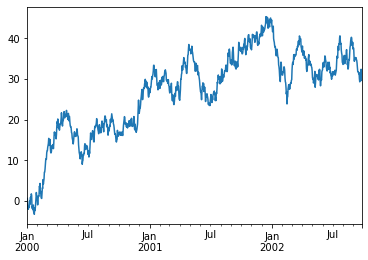

In [105]:
ts = pd.Series(np.random.randn(1000),
               index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

**DataFrame** 的 **plot()** 方法可以快速绘制**所有带标签的列**：

<AxesSubplot:>

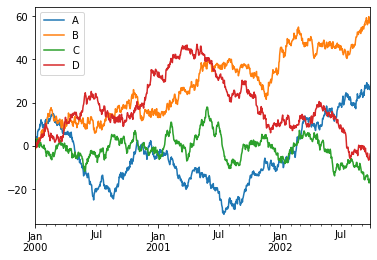

In [106]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
df.plot()

## 数据输入 / 输出

In [107]:
!mkdir -p ./output

### CSV

写入 **CSV** 文件。

In [108]:
df.to_csv('./output/foo.csv')

读取 **CSV** 文件数据：

In [109]:
pd.read_csv('./output/foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,1.407336,-1.366758,1.321699,1.689886
1,2000-01-02,1.773102,-1.297804,1.501675,1.655079
2,2000-01-03,2.158958,-0.023204,2.952180,-0.146267
3,2000-01-04,1.928531,1.007273,2.068409,-0.440240
4,2000-01-05,4.199505,3.331968,3.179862,-0.266628
...,...,...,...,...,...
995,2002-09-22,26.947362,59.791781,-15.845410,-6.624966
996,2002-09-23,26.630807,58.815843,-17.130237,-5.849773
997,2002-09-24,27.528561,57.922209,-16.660029,-6.069054
998,2002-09-25,26.029153,56.824301,-16.086449,-4.871377


### HDF5

写入 **HDF5 Store**：

In [110]:
help(df.to_hdf)

Help on method to_hdf in module pandas.core.generic:

to_hdf(path_or_buf, key: 'str', mode: 'str' = 'a', complevel: 'int | None' = None, complib: 'str | None' = None, append: 'bool_t' = False, format: 'str | None' = None, index: 'bool_t' = True, min_itemsize: 'int | dict[str, int] | None' = None, nan_rep=None, dropna: 'bool_t | None' = None, data_columns: 'bool_t | list[str] | None' = None, errors: 'str' = 'strict', encoding: 'str' = 'UTF-8') -> 'None' method of pandas.core.frame.DataFrame instance
    Write the contained data to an HDF5 file using HDFStore.
    
    Hierarchical Data Format (HDF) is self-describing, allowing an
    application to interpret the structure and contents of a file with
    no outside information. One HDF file can hold a mix of related objects
    which can be accessed as a group or as individual objects.
    
    In order to add another DataFrame or Series to an existing HDF file
    please use append mode and a different a key.
    
    .. warning::
    


In [111]:
df.to_hdf('./output/foo.h5', 'df')

读取 **HDF5 Store**：

In [112]:
pd.read_hdf('./output/foo.h5', 'df')

,A,B,C,D
2000-01-01,1.407336,-1.366758,1.321699,1.689886
2000-01-02,1.773102,-1.297804,1.501675,1.655079
2000-01-03,2.158958,-0.023204,2.952180,-0.146267
2000-01-04,1.928531,1.007273,2.068409,-0.440240
2000-01-05,4.199505,3.331968,3.179862,-0.266628
...,...,...,...,...
2002-09-22,26.947362,59.791781,-15.845410,-6.624966
2002-09-23,26.630807,58.815843,-17.130237,-5.849773
2002-09-24,27.528561,57.922209,-16.660029,-6.069054
2002-09-25,26.029153,56.824301,-16.086449,-4.871377


### Excel

写入 **Excel** 文件：

In [113]:
df.to_excel('./output/foo.xlsx', sheet_name='Sheet1')

读取 **Excel** 文件：

In [114]:
pd.read_excel('./output/foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,Unnamed: 0,A,B,C,D
0,2000-01-01,1.407336,-1.366758,1.321699,1.689886
1,2000-01-02,1.773102,-1.297804,1.501675,1.655079
2,2000-01-03,2.158958,-0.023204,2.952180,-0.146267
3,2000-01-04,1.928531,1.007273,2.068409,-0.440240
4,2000-01-05,4.199505,3.331968,3.179862,-0.266628
...,...,...,...,...,...
995,2002-09-22,26.947362,59.791781,-15.845410,-6.624966
996,2002-09-23,26.630807,58.815843,-17.130237,-5.849773
997,2002-09-24,27.528561,57.922209,-16.660029,-6.069054
998,2002-09-25,26.029153,56.824301,-16.086449,-4.871377


## 各种坑（Gotchas）

执行某些操作，将**触发异常**，如:

In [115]:
if pd.Series([False, True, False]):
    print("I was true")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
pd.Series([False, True, False])